# Platte

Die Steifigkeit einer linear elastischen Platte mit Höhe $h$ und Breite $2a$ ist nach dem vereinfachten 2D Kirchhof-Love-Plattenmodell gebeben durch $$D=\frac{Eh^3}{12(1-\nu^2)}.$$

Wobei $E,\nu$ wie beim Zugstab Materialkonstanten sind; siehe z.B. [Timoshenko, Woinowski-Krieger, 2016].

<table><tr>
<td> <img src="FIGURES/platteRandbedingungen.PNG" width="500" height="500"/> </td>
</tr></table>

Wenn $f$ eine Flächenlast ("Druck") ist, die in der Platte wirkt, dann ist die Durchbiegung $w$ der Platte gegeben durch $$D\Delta^2 w=f.$$

Wobei $$\Delta^2 w=\frac{\partial^4 w}{\partial x^4}+2\frac{\partial^4 w}{\partial x^2 \partial y^2}+\frac{\partial^4 w}{\partial x^4}.$$

Am Rand $\sqrt{x^2+y^2}=a$ sei $w=0$ d.h. die Platte fixiert (Ableitung verschwindet Rand und in der Mitte).  

In Radialkoordinaten formuliert ergibt sich $$D\frac{1}{r}\frac{\partial}{\partial r}\left(\frac{1}{r}\frac{\partial}{\partial r}\left(\frac{1}{r}\frac{\partial}{\partial r}\left(r\frac{\partial w}{\partial r}\right)\right)\right)=f$$
Nach [Timoshenko, Woinowski-Krieger, 2016] ergibt sich dann die Verschiebung $$w(r)=\frac{f}{64D}\left(a^2-r^2\right)^2.$$

Daraus ergibt sich die maximale Verschiebung in der Mitte

$$w_{max}=\frac{fa^4}{64D}$$

und die maximale Spannung ergibt sich am Rand durch $$\sigma_{max}=\frac{3}{4}\frac{fa^2}{h^2},$$

siehe [Timoshenko, Woinowski-Krieger, 2016]; siehe auch [Landau, Lifschitz, 1975].

## Konkretes Beispiel

$h=1 m$, $a=30 m$, $f=7850\cdot h\cdot9.8066\frac{N}{m^2}$

In [5]:
import numpy as np

# h=1 und 0.75 z.B., Bild fuer h=1 m

emod=200 #stahl
nu=0.3
A=np.pi*(30.)**2
hoehe=0.75
a=30
E=emod*10**9
gewicht=(7850)*(hoehe*A)
kraft=gewicht*9.8066

f=hoehe*7850*9.8066

D=(E*hoehe**3)/(12*(1-nu**2))



wmax=(f*a**4)/(64*D)

wmax

0.094572153585

In [6]:
sigmamax=(3/4.)*(f*(a**2))/(hoehe**2)

sigmamax*10**(-6)

69.28362899999999

In [7]:
sigmamax*10**(-7)

6.9283629

In [8]:
(f)/(64*D)

1.1675574516666667e-07

<table><tr>
<td> <img src="FIGURES/plate_analytical_uz_scaled_3.PNG" width="400" height="200"/> </td>
<td> <img src="FIGURES/platte_ansys_w_seitlich.PNG" width="450" height="300"/> </td>
</tr></table>

Die Verschiebungen können gut approximiert werden. Auch die maximale Spannung wird relativ gut approximiert und tritt wie analytisch vorhergesagt, am Rand auf. Die Unterschiede zwischen 3D FEM und analytischer Approximation können analog zum Zugstabbeispiel durch genauere analytische Approximationen reduziert werden. Der Aufwand für genauere Approximationen ist bei Platten jedoch höher, da im Gegensatz zu Biegebalken, Zugstab, Torsionsttab, die Platte analytisch in 2D ist. 

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import numpy as np
from scipy import integrate
from fem.funktionen import *
import seaborn as sns
#sns.set()
mpl.rcParams["figure.figsize"] = (20,7)
mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.markersize'] = 15
#sns.set()
farben = sns.color_palette()
plt.style.use('seaborn-darkgrid')
farben = sns.color_palette()

Text(0.5, 1.0, '$w(r)=\\frac{f}{64D}\\left(a^2-r^2\\right)^2$')

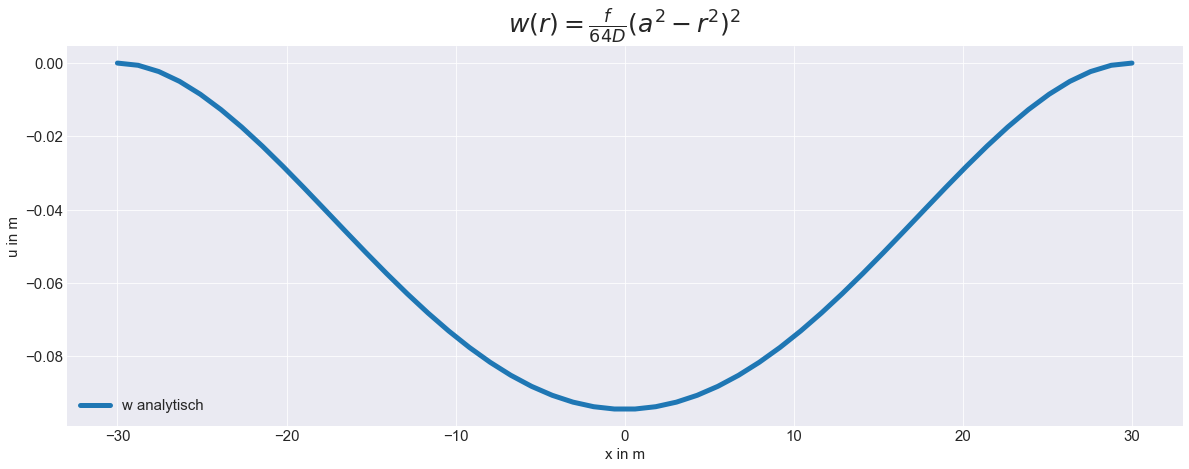

In [21]:
r = np.linspace(-30, 30)
ax=plt.axes()
ax.tick_params(labelsize=15)
ax.plot(r, -f/(64*D)*(a**2-r**2)**2, label = r'w analytisch', color=farben[0]),
ax.tick_params(labelsize=15)
ax.set_xlabel(xlabel='x in m',fontsize=15)
ax.set_ylabel(ylabel='u in m',fontsize=15)
plt.legend(loc='best',fontsize=15)
ax.set_title(r"$w(r)=\frac{f}{64D}\left(a^2-r^2\right)^2$", fontsize=25)